In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

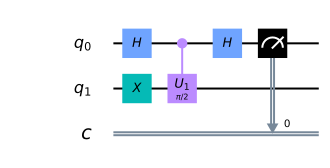

In [2]:
# KPE implementation with an arbitrary phase

circ = QuantumCircuit(2, 1) # Create Quantum Circuit with 2 quantum register and 1 classical register

phase = 0.25 # Phase that we want to estimate

circ.x(1) # Prepare the eigenstate

circ.h(0)
circ.cu1(2*np.pi*phase, 0, 1)
circ.h(0)

circ.measure(0, 0)

circ.draw(output='mpl')

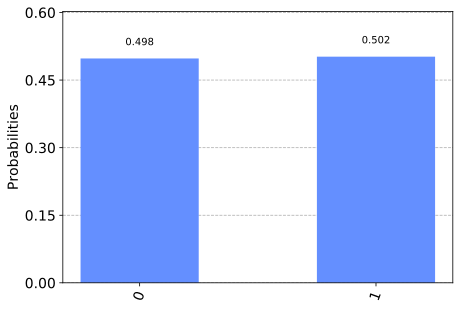

In [3]:
# Run simulation

shots = 1024

backend = Aer.get_backend('qasm_simulator')
result = execute(circ, backend=backend, shots=shots).result()
counts = result.get_counts()
plot_histogram(counts)

In [4]:
print('Estimated phase {}'.format((1/np.pi)*np.arcsin(np.sqrt(counts['1']/shots))))
print('Real phase {}'.format(phase))

Estimated phase 0.2506217005775259
Real phase 0.25


In [5]:
# Get the circuit running on a real quantum computer

shots = 1024 
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmqx2


In [6]:
shots = 1024 
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.backends.ibmq_ourense

Credentials are already in use. The existing account in the session will be replaced.


In [7]:
job_exp = execute(circ, backend=backend, shots=shots)
job_monitor(job_exp)

Job Status: job has successfully run


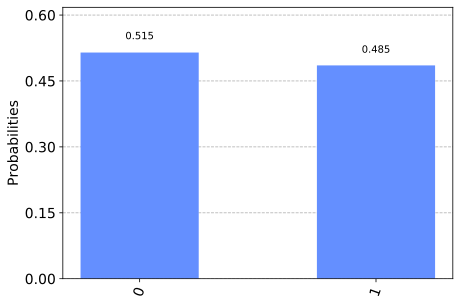

In [8]:
result = job_exp.result()
counts = result.get_counts()
plot_histogram(counts)

In [9]:
print('Estimated phase {}'.format((1/np.pi)*np.arcsin(np.sqrt(counts['1']/shots))))
print('Real phase {}'.format(phase))

Estimated phase 0.2453365902581869
Real phase 0.25
